# Lien entre la base souscription et la base le furet

- Code Original : Marouan 
- Code original pour lecture Le Furet : Clémentine
- Révisé : Guillaume Gorge 2/5/23




## 1. Initialisation Phase


In [126]:
# variables indiquant si on relit ou non toute la base

# generation_source = 'Aggregator' 'Portal'

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
from datetime import date
import math
from plotly import graph_objects as go
import json 
import seaborn as sns
import pandas_profiling
import sys


In [128]:
## Python directory
### <--------------------------- TO BE CHANGED ---------------------------> ### 
PYTHON_DIRECTORY = 'https://github.com/ornikar/pricing-insurance/Shared Notebooks'
PYTHON_DIRECTORY = 'C:/Users/guill/GitHub/2023 Ornikar Pricing/pricing-insurance/Python Official Library/'
 
LATEX_MAIN_DIRECTORY = 'C:/Users/guill/GitHub/2023 Ornikar Pricing/pricing-insurance/Latex/OrnikarInsuranceAutomaticResults/'
LATEX_DIRECTORY = 'C:/Users/guill/GitHub/2023 Ornikar Pricing/pricing-insurance/Latex/OrnikarInsuranceAutomaticResults/Dashboard_Latex/'

RESULTS_DIRECTORY = 'C:/Users/guill/GitHub/2023 Ornikar Pricing/pricing-insurance/Results/'
### <--------------------------- TO BE CHANGED ---------------------------> ### 


sys.path.insert(1, PYTHON_DIRECTORY)


from importlib import reload  # Python 3.4+
import OrnikarDataFormat
import TransformedDataReading
import LinkQuotations
import LeFuretLibrary
import GraphicStatLibrary
import CensoredDataLibrary

# instruction pour forcer la relecture d'une base (utile quand on code ;) 
# LeFuretLibrary = reload(LeFuretLibrary)
# GraphicStatLibrary = reload(GraphicStatLibrary)


In [129]:
#!pip install lifelines

In [130]:
# Définition du mode de lecture / écriture des base : 
ModeGlobal = True # True or False : True pour tout lire
ModeSpeed = 'Full' # 'Full' means to keep all variables at the expense of Speed. Put 'Quick' instead
periodLeFuret =  '2023-03' # mois le Furet à lire
if ModeGlobal and ModeSpeed == 'Full':
    print("Full reading of BigQuery and all DataBases")
    mode = 'Google' 
    SizeVariablesKeptGW = 'Full' # We keep all the variables of GW except var_to_suppress.
elif ModeGlobal:
    print("Fast Mode through limited selection of variables - good for Clementine")
    mode = 'Google' 
    SizeVariablesKeptGW = 'Quick' # We keep all the variables of GW except var_to_suppress.
else: 
    mode = 'ReadLocalBase'
    SizeVariablesKeptGW = 'Full'


Full reading of BigQuery and all DataBases


In [131]:

# Import the data base

### <--------------------------- TO BE CHANGED ---------------------------> ### 
BASE_PATH = 'C:/Users/guill/GitHub/2023 Ornikar Empreinte/Data' 
BASE_PATH_LEFURET = 'C:/Users/guill/GitHub/2023 Coherence Tarifaire/Data' 
BASE_PATH_RES = RESULTS_DIRECTORY
### <--------------------------- TO BE CHANGED ---------------------------> ### 


In [132]:
## Variables to Keep Guidewire

# Liste Clémentine
var_process = ['account_id',  'account_number', 'submission_created_at', 'bind_date',  'job_id',  'job_number', 'policy_id',  'policy_number', 'tariff_viewed', 'wakam_called', 'tariff_accepted', 'wakam_pricing_version',
                'generation_source', 'online_offline' ,'ph_email']
var_risk = ['ph_email', 'loss_history_type', 'recommended_package', 'package_subtype', 'md_age', 'md_license_duration', 'vh_age',  'md_prefix',  'md_crm_coefficient', 'md_license_country', 'vh_sra_code', 'vh_license_plate','vh_annual_km','PACKAGE', ]  
# if SizeVariablesKeptGW = 'Full' alors à ces variables sont ajoutées TOUTES les variables sauf var_to_suppress
var_to_suppress = ['vh_sra_code','Unnamed: 0', 'insurer_name','submission_creation_user_name','update_user_id','ph_first_name','ph_last_name','ph_email','ph_phone'
] # vh_sra_code est en doublon

# Liste Guillaume 
var_process = ['account_id',  'account_number', 'submission_created_at', 'bind_date',  'job_id',  'job_number', 'policy_id',  'policy_number', 'tariff_viewed', 'wakam_called', 'tariff_accepted', 'policy_status', 'wakam_pricing_version',
                'generation_source', 'online_offline','ph_email' ]
var_risk = [ 'loss_history_type', 'recommended_package', 'package_subtype', 'md_age', 'md_license_duration', 'vh_age',  'md_prefix',  'md_crm_coefficient', 'md_license_country', 'vh_sra_code', 'vh_license_plate','vh_annual_km','PACKAGE', ]  

# suppression 'ph_gender' et remplacement par md_prefix

var_premium = ['total_premium_rpt','total_cost_rpt']


In [133]:
# Variable to Keep LeFuret

columnstoKeep = ['IdClient', 'SRA_Groupe', 'SRA_Classe', 'VEH_Antecedent',
       'premium_TTC', 'premium_HT', 'premium_RCC_TTC', 'premium_RCM_TTC',
       'premium_DRX_TTC', 'premium_PROPIL_TTC', 'premium_BDG_TTC',
       'premium_VLX_TTC', 'premium_INC_TTC', 'premium_CATNAT_TTC',
       'premium_CATECH_TTC', 'premium_EVCLM_TTC', 'premium_DOM_TTC', 'PP_RC',
       'PP_VOL', 'PP_INC', 'PP_BDG', 'PP_DOM', 'PP_SDC','message','ph_email']



columnstoKeepSmall = [ 'IdClient',
       'premium_TTC', 'premium_HT', 'premium_RCC_TTC', 'premium_RCM_TTC',
       'premium_DRX_TTC', 'premium_PROPIL_TTC', 'premium_BDG_TTC',
       'premium_VLX_TTC', 'premium_INC_TTC', 'premium_CATNAT_TTC',
       'premium_CATECH_TTC', 'premium_EVCLM_TTC', 'premium_DOM_TTC','message']

columnstoKeepSmall =['IdClient','premium_TTC','premium_HT','PP_RC','PP_VOL', 'PP_INC', 'PP_BDG', 'PP_DOM', 'PP_SDC','message'] 
# La prime Furet est TTC, premium HT est conservée pour le S/C

columnsPremium = ['premium_TTC', 'premium_HT', 'premium_RCC_TTC', 'premium_RCM_TTC',
       'premium_DRX_TTC', 'premium_PROPIL_TTC', 'premium_BDG_TTC',
       'premium_VLX_TTC', 'premium_INC_TTC', 'premium_CATNAT_TTC',
       'premium_CATECH_TTC', 'premium_EVCLM_TTC', 'premium_DOM_TTC','message']
columnsPremiumRC = [c+'_RC' for c in columnsPremium]
columnsPremiumRCP = [c+'_RCP' for c in columnsPremium]
columnsPremiumTR = [c+'_TR' for c in columnsPremium]

In [134]:
# Base le Furet méthode 2 : description automatique et suppression des variables non pertinentes.
# voir méthode que l'on retient au final

# Attention, clémentine, pour toi, faire un filtre sur [['custom_qr_id', 'couverture_demandée', 'mediane', 'annee_naissance', 'segment']]
featureLF_a_conserver = [['custom_qr_id', 'couverture_demandée', 'mediane', 'segment','md_age']] 

features_a_supprimer =['custom_qr_id','Unnamed: 0','Unnamed: 0.1','assureur','id','mediane', 'moyenne', 'position_vue', 'prix', 'id_externe_tarif', 'couverture','custom_offer_id',
                       'DTA_Incluse',	'DTA_Franchise_Montant',	'VI_Incluse',	'VI_Franchise_Montant',	'BDG_Incluse',	'BDG_Franchise_Montant',	'ASS_Panne_Incluse',	'ASS_Panne_Franchise_Montant',	'ASS_Accident_Incluse',	'ASS_Accident_Franchise_Montant',	'VR_Accident_Incluse',	'GC_Incluse',
                     	'custom_offer_id','PositionMediane','Position5HorsMediane','position_mer','devis','rappel','souscription']  
# un certain nombre de variables buguent car plusieurs formats. On les enlève dans un premier temps
# ! TODO il faudra essayer de les reintégrer
features_trop_large = ['code_postal','code_postal_travail','auto_sec_his_assure_actuel',
                       'auto_veh_tra_france','auto_pri_inf_conjoint_permis','auto_pri_inf_conjoint_autre_veh','auto_pri_his_sin_1_tiers','auto_pri_his_sin_2_tiers',
                       'auto_pri_his_sin_3_tiers','auto_pri_his_sin_4_tiers','auto_pri_his_sin_5_tiers',
                       'auto_pri_his_sin_corp_1_enquete','auto_pri_his_sin_corp_2_enquete','auto_pri_his_sin_corp_3_enquete','auto_pri_his_sin_corp_4_enquete','auto_pri_his_sin_corp_5_enquete',' ',
                       'auto_pri_his_sin_corp_1_prison', 'auto_pri_his_sin_corp_1_prison', 'auto_pri_his_sin_corp_2_prison','auto_pri_his_sin_corp_3_prison','auto_pri_his_sin_corp_4_prison','auto_pri_his_sin_corp_5_prison',
                       'auto_ass_dtl_souscription']
# auto_veh_garage_nt_departement_value était avant enlevé


In [135]:
### Variable Wakam
# Faire le Tri
VariableSRAWakam= ['SRA_CodeEnergie	SRA_PtacENkg','SRA_PuissanceReelleMaxiCEE',	'VEH_RatioWeightPower',	'SRA_Suspension	SRA_Alimentation',	'SRA_VitesseMaxi',	'SRA_TypeFreins',	'SRA_Carrosserie',	'VEH_Carrosserie_FOCUS',	'SRA_Transmission',	'SRA_NombrePlaces',	'SRA_ClasseReparationActuelle']
VariableSRAWakam= ['SRA_PuissanceReelleMaxiCEE','VEH_RatioWeightPower']



In [136]:
#Table de référence pour les libellés correspondant à une couverture donnée
var = {
    "libelle_import": ["RC", "RC+", "TR"], 
    "sexy_title": ["1. Tiers", "2. Tiers Etendue", "3. Tous Risques"],
    "2023-02" : ['All_Quote_Priced_02_2023_RC','All_Quote_Priced_02_2023_RC+','All_Quote_Priced_02_2023_TR'],
    "2023-03" : ['All_Quotes_RC_03_2023','All_Quotes_RC+_03_2023','All_Quotes_TR_03_2023'],
    }

couverture = ["tiers", "vol_incendie", "tous_risques"]
dico_couv = pd.DataFrame(var, index = couverture)
dico_couv

,libelle_import,sexy_title,2023-02,2023-03
tiers,RC,1. Tiers,All_Quote_Priced_02_2023_RC,All_Quotes_RC_03_2023
vol_incendie,RC+,2. Tiers Etendue,All_Quote_Priced_02_2023_RC+,All_Quotes_RC+_03_2023
tous_risques,TR,3. Tous Risques,All_Quote_Priced_02_2023_TR,All_Quotes_TR_03_2023


## 2. Reading DataBases

In [137]:
## Read either data base located on the computer (mode = 'ReadLocalBase') or through Google Big Query directly with the update of local data base (option = "Google")

df, df_previous_claims, df_previous_insurers, df_previous_terminations, df_previous_license_cancellations_suspensions  = TransformedDataReading.GoogleAllDataBaseReading(mode=mode, BASE_PATH =BASE_PATH)
#df, df_previous_claims, df_previous_insurers, df_previous_terminations, df_previous_license_cancellations_suspensions  = TransformedDataReading.GoogleAllDataBaseReading(mode='Google', BASE_PATH =BASE_PATH)

c:\Users\guill\anaconda3\envs\OnlyPIP\lib\site-packages\google\auth\_default.py:78: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


c:\Users\guill\anaconda3\envs\OnlyPIP\lib\site-packages\google\auth\_default.py:78: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
c:\Users\guill\anaconda3\envs\OnlyPIP\lib\site-packages\google\auth\_default.py:78: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
c:\Users\guill\anaconda3\envs\OnlyPIP\lib\site-packages\google\auth\_default.py:78: UserWarning: Your application has 

In [138]:
# Formatting Data 
OrnikarDataFormat = reload(OrnikarDataFormat)
dfFormat = OrnikarDataFormat.FormatGuideWire(df)
print('Number of policies UW : '+str(dfFormat['tariff_accepted'].sum()))


['submission_created_at', 'job_close_date', 'bind_date', 'issue_date', 'cancellation_date', 'original_effective_date', 'period_start', 'period_end', 'creation_date', 'update_date', 'price_computed_at', 'written_date', 'policy_period_start', 'policy_period_end']
Number of policies UW : 2657


In [139]:
dfFormat["md_license_duration"]

0          0.0
1         10.0
2          1.0
3          0.0
4          3.0
          ... 
270288    18.0
270289    18.0
270290    18.0
270291    18.0
270292    18.0
Name: md_license_duration, Length: 270293, dtype: float64

In [140]:
# Definition de var_other qui contient toutes les variables qui n'ont pas été explicitement rejetées dans var_suppress
from itertools import chain
var_other = [col for col in dfFormat.columns if col not in list(chain(var_process, var_risk, var_premium ,var_to_suppress,['account_id', 'submission_created_at']))  ]
for col in var_other:
    if col == 'vh_sra_code':print('probleme')
    if col == 'account_id':print('problème')
    if col == 'md_license_country':print(col)
print('liste var_others')
print(var_other)

liste var_others
['policy_period_public_id', 'policy_public_id', 'sf_external_contact_id', 'policy_term_public_id', 'wakam_quote_id', 'wakam_price_test', 'wakam_price_test_perc_applied', 'job_type', 'job_public_id', 'job_close_date', 'issue_date', 'cancellation_date', 'cancellation_nature', 'sf_submission_id', 'sf_opportunity_id', 'original_effective_date', 'period_start', 'period_end', 'period_id', 'creation_date', 'update_date', 'price_computed_at', 'last_policy_period_id', 'product_code', 'policy_term_id', 'risk_type', 'written_date', 'submission_creation_user_id', 'submission_creation_user_email', 'is_from_aggregator', 'is_anonymous', 'session_id', 'utm_source', 'utm_medium', 'utm_campaign', 'utm_term', 'utm_content', 'policy_risk_profile', 'policy_risk_profile_edu', 'has_formulas', 'has_selected_formula', 'account_public_id', 'ph_prefix', 'ph_birthdate', 'md_property_owner_type', 'md_accommodation_type', 'phc_policy_contact_role_public_id', 'phc_sf_external_contact_id', 'md_driver

In [141]:
# Suppression des doublons et conservation uniquement des variables d'intérêt
''' sortOrder = [True,True] : choose the first quote of a specific account; [True,False] : the last one ''' 
TransformedDataReading = reload(TransformedDataReading)

subf=TransformedDataReading.UniqueRow(dfFormat,sortOrder = [True, True], var_process = var_process,
            var_risk = var_risk ,       
            var_premium = var_premium,var_other = var_other, size = SizeVariablesKeptGW)
 

Suppression of Doublons 
Il existe 270293 lignes avant dédoublonnage
Il existe 241481 lignes lorsqu'on dédoublonne par account_id


In [142]:
# Base SRA
df_SRA = pd.read_csv(f'{BASE_PATH}/Wakam_vehiculier_auto 04-2023 (dwld PlugPlay).csv', sep=';',low_memory=False)
# On récupère les 3 variables SRA manquantes (classe, poids véhicule vide, puissance DIN)
df_SRA = df_SRA[['SRAIdentifiant','Classe','PoidsASec','PuissanceReelleMaxiDINenCv']]
# Ajout de variables comme le vehicule Ratio
df_SRA = OrnikarDataFormat.FormatSRA(df_SRA,Stat=False)

In [143]:
#pandas_profiling.ProfileReport(subf, minimal=True)

In [144]:
# Merge of all the Databases of GuideWire into a unique One
OrnikarDataFormat = reload(OrnikarDataFormat)
#display(df,df_SRA,df_previous_claims,df_previous_insurers,df_previous_terminations,df_previous_license_cancellations_suspensions) 
BaseQuotation = OrnikarDataFormat.mergeBaseGuideWire(dfFormat,df_SRA,df_previous_claims,df_previous_insurers,df_previous_terminations,df_previous_license_cancellations_suspensions,Stat=True)
print('Number of policies UW : '+str(BaseQuotation['tariff_accepted'].sum()))
#pandas_profiling.ProfileReport(BaseQuotation, minimal=True)
BaseQuotation = OrnikarDataFormat.FormatGuideWire(BaseQuotation)
print('Number of policies UW : '+str(BaseQuotation['tariff_accepted'].sum()))

segment marketing


,segment
3. Standard,156072
2. Jeune permis - > 21 ans,43705
1. Jeune permis - 18-21 ans,32429
4. Sans Antécédent,28264
5. Aggravé (CRM > 100),9276
<NA>,543


segment Reinsurer


,ReinsurerSegment
3. Standard,156072
2. Young Driver with No EduScore,56775
4. Interrupted,28264
1b. Young Driver with EduScore (bad),10544
1a. Young Driver with EduScore (Good),9347
3b. Standard - poor CRM,5444
2b.Young Driver - poor CRM,3345
4b. Interrupted - poor CRM,487
<NA>,11


case with NA Segment 543


,segment,md_risk_profile,md_crm_coefficient,md_license_duration,duree_assurance_sur_3ans,md_edu_score,md_age
743,<NA>,Unknown,1.0,0.0,0.000000,<NA>,17.0
820,<NA>,Unknown,1.0,0.0,0.000000,<NA>,17.0
1735,<NA>,Young Driver,1.0,0.0,35.976098,<NA>,17.0
2423,<NA>,Young Driver,1.0,0.0,0.000000,<NA>,17.0
2442,<NA>,Unknown,1.0,0.0,0.000000,<NA>,17.0
...,...,...,...,...,...,...,...
263138,<NA>,Young Driver,1.0,0.0,8.969383,<NA>,17.0
265059,<NA>,Unknown,1.0,0.0,8.969383,<NA>,17.0
265060,<NA>,Unknown,1.0,0.0,8.969383,<NA>,17.0
268420,<NA>,Unknown,1.0,0.0,11.992033,<NA>,17.0


case with NA ReinsurerSegment


,ReinsurerSegment,md_risk_profile,md_crm_coefficient,md_license_duration,duree_assurance_sur_3ans,md_edu_score
27304,<NA>,Unknown,NaN,NaN,0.000000,<NA>
34730,<NA>,Unknown,NaN,NaN,0.000000,<NA>
67353,<NA>,No Previous Insurance,NaN,NaN,0.000000,<NA>
94392,<NA>,Young Driver,NaN,NaN,0.000000,<NA>
123456,<NA>,No Previous Insurance,NaN,NaN,0.000000,<NA>
125199,<NA>,Aggravated Not Paid Premium,NaN,NaN,0.000000,<NA>
125349,<NA>,Unknown,NaN,NaN,0.000000,<NA>
140731,<NA>,Unknown,NaN,NaN,0.000000,<NA>
147186,<NA>,Unknown,NaN,NaN,0.000000,<NA>
167016,<NA>,Unknown,NaN,9.0,35.976098,<NA>


Output Database with 270289 lines and 208 Columns
Number of policies UW : 2657
['cancellation_date', 'submission_created_at_Timestamp']
Number of policies UW : 2657


In [145]:
# Indicatrices - Règles GW 
OrnikarDataFormat = reload(OrnikarDataFormat)
BaseQuotation = OrnikarDataFormat.IndicatorsUnderwritingRules(df_temp=BaseQuotation,Stat = True)
print('Number of policies UW : '+str(BaseQuotation['tariff_accepted'].sum()))


Profil Original Guidewire


0
policy_risk_profile         is_JEUNE is_STANDARD is_SANS_ANTECEDENT        
Standard                    False    True        False               129576
Young Driver                True     False       False                60215
No Previous Insurance       False    False       True                 22378
Unknown                     True     False       False                15105
                            False    True        False                13461
                                     False       False                12908
Standard                    False    False       True                  4985
Unknown                     False    False       True                  4651
Aggravated Not Paid Premium False    False       False                 3966
Aggravated Malicious        False    False       False                 1922
No Previous Insurance       False    True        False                  558
Standard                    False    False       False                  452
                            True     False       False                   30
Young Driver                False    False       False                   25
No Previous Insurance       False    False       False                   22
Aggravated Alcohol or Drugs False    False       False                   22
No Previous Insurance       True     False       False                   13

Number of policies UW : 2657


In [146]:
#display(dfFormatLL[(dfFormatLL['prospect_id_trail'] == 861)])
#display(dfFormatLL[['is_from_aggregator','prospect_id','submission_created_at']][(dfFormatLL['prospect_id']=='1981-05-24_CHEVROLET_CRUZE_09120')])*



# Identification of policy coming from aggregator 

OrnikarDataFormat = reload(OrnikarDataFormat)
dfFormatLL = OrnikarDataFormat.LinkLeLynx(df=BaseQuotation,Stat=True,BASE_PATH_RES=BASE_PATH_RES)

#dfFormatLL = OrnikarDataFormat.LinkLeLynx(df=BaseQuotation[(BaseQuotation['segment']=='1. Jeune permis - 18-21 ans')],Stat=True,BASE_PATH_RES=BASE_PATH_RES)
#display(dfFormatLL[['prospect_id','ph_email','is_anonymous']][(dfFormatLL['prospect_id']=='1996-08-05_FIAT_500_31700')&(dfFormatLL['is_not_anonymous']==True)])
#display(dfFormatLL[['prospect_id','vh_notyet_bought','is_from_aggregator','is_anonymous','has_been_on_Ornikarsite','is_bound','session_id','ph_email','is_anonymous']][(dfFormatLL['prospect_id']=='1981-05-24_CHEVROLET_CRUZE_09120')&(dfFormatLL['is_anonymous']==False)])



#dfFormatLL['clicked'] = (dfFormatLL['session_id'].notna())
#dfFormatLL['is_bound'] = (dfFormatLL['period_status']=='Bound')
#display(dfFormatLL['vh_notyet_bought'].value_counts(dropna=False))



(270289, 287)

(270015, 291)

,prospect_id,counts
0,1981-05-24_CHEVROLET_CRUZE_09120,1088
1,1946-01-01_CITROEN_C5 II TOURER_45000,626
2,1974-10-03_RENAULT_CLIO IV_39300,500
3,1980-11-12_PEUGEOT_308_31820,417
4,1988-10-14_OPEL_AGILA_44640,352
...,...,...
161781,1999-08-17_RENAULT_MEGANE III_34430,1
161782,2002-05-11_RENAULT_CLIO III_77177,1
161783,1990-06-01_RENAULT_GRAND SCENIC_62400,1
161784,1978-01-09_RENAULT_GRAND SCENIC_11210,1


TotalNumber of Quote Submissions that are done by competition for Pricing Watch : 13491


In [147]:
#dfFormatLL[['policy_number','prospect_id']][(dfFormatLL['policy_number']=='ONK0013120-W')]

# Police du premier sinistre corpo Ornikar
#dfFormatLL[(dfFormatLL['prospect_id'] =='1997-06-03_FORD_TRANSIT_78170')].to_excel((f'{BASE_PATH_RES}/outputCorpo.xlsx'))

In [148]:
dfStat = dfFormatLL[['prospect_id','vh_notyet_bought','is_from_aggregator','is_anonymous','is_not_anonymous','is_bound','submission_created_at']].groupby(by = ['prospect_id'],as_index=False).agg(vh_notyet_bought=('vh_notyet_bought', max), is_from_aggregator=('is_from_aggregator', 'max'), has_been_on_aggregator=('is_anonymous', 'max'),
                                                                                                                                                                  has_been_on_Ornikarsite=('is_not_anonymous', 'max'),
                                                                                                                                                                   is_bound=('is_bound', 'max'),SubmissionNbr=('is_bound', 'count'),
                                                                                                                                                                   FirstQuoteDate=('submission_created_at',min),
                                                                                                                                                                   LastQuoteDate =('submission_created_at',max), 
                                                                                                                                                                   )
#display(dfStat.sort_values(by=['SubmissionNbr'], ascending = False))
#display(dfStat[(dfStat['has_been_on_Ornikarsite'] == 1)&(dfStat['has_been_on_aggregator'] == 1)].sort_values(by=['SubmissionNbr'], ascending = False))

Stat = pd.DataFrame(dfStat[['is_from_aggregator','has_been_on_aggregator','vh_notyet_bought','has_been_on_Ornikarsite','is_bound']].value_counts(dropna=False).reset_index(name='counts'), index=None)
display(Stat)


,is_from_aggregator,has_been_on_aggregator,vh_notyet_bought,has_been_on_Ornikarsite,is_bound,counts
0,True,True,False,False,False,80724
1,False,False,False,True,False,34937
2,True,True,True,False,False,30983
3,False,False,True,True,False,6788
4,True,True,False,True,False,4271
5,False,False,False,True,True,2044
6,True,True,True,True,False,1324
7,True,True,False,True,True,386
8,True,False,False,True,False,119
9,False,False,True,True,True,107


In [149]:
dfStat

,prospect_id,vh_notyet_bought,is_from_aggregator,has_been_on_aggregator,has_been_on_Ornikarsite,is_bound,SubmissionNbr,FirstQuoteDate,LastQuoteDate
0,1900-01-01_PEUGEOT_207_75004,True,False,False,True,False,3,2023-06-03,2023-06-03
1,1900-01-10_ALFA ROMEO_ALFA 147_91550,False,False,False,True,False,2,2023-06-09,2023-06-20
2,1900-02-02_SEAT_IBIZA_75001,False,False,False,True,False,1,2023-06-12,2023-06-12
3,1900-02-10_VOLKSWAGEN_TOURAN_29200,False,False,False,True,False,1,2023-06-26,2023-06-26
4,1900-05-05_DACIA_SANDERO_75010,False,False,False,True,False,1,2023-05-23,2023-05-23
...,...,...,...,...,...,...,...,...,...
161781,2006-06-14_ROVER_75_56310,True,True,True,False,False,2,2023-06-24,2023-06-24
161782,2006-06-17_AUDI_A4 V_75002,False,True,True,False,False,1,2023-06-23,2023-06-23
161783,2006-06-19_SEAT_LEON_52190,False,True,True,False,False,1,2023-06-25,2023-06-25
161784,2006-06-19_VOLKSWAGEN_GOLF IV_52190,False,True,True,False,False,1,2023-06-25,2023-06-25


### 2.2 Statistique sur la souscription et sortie Latex

In [157]:
                     

# segemnts avec faible NbreQuote
# ['prospect_id_trail']
def UWAnalysis(df, date="2023-06-23",Stat=True):
    df2 = df.copy()
    # Creation of Date, a variable comparing last day result with previous week and since the beginning
    dateJour = pd.to_datetime(date)
    dateWeek = dateJour - np.timedelta64(7, 'D')
    print(dateWeek)
    
    # creation of Date, a categorial variable depending on the difference between the current date and the submission date
    df2['Date'] = '3. > 1 week'
    df2['Date'] = df2['Date'].mask(df2['submission_created_at'] > (dateWeek),"2. W Week")
    df2['Date'] = df2['Date'].mask(df2['submission_created_at'] == dateJour,"1. D day")
    df2['Date'] = df2['Date'].mask(df2['submission_created_at'] > dateJour,"0. Post D day")

    print('There are UW after D Day : '+str(df2[['Date']][(df2['Date']== "0. Post D day")].count()))
    
    df2 = df2[~(df2['Date']== "0. Post D day")]

    if Stat: display(df2[['Date']].value_counts())
    df2['wakam_called'] =1
    for variable in ['wakam_called','tariff_viewed','tariff_accepted']:
        Newvariable = variable+'_dedouble'
        Totalvariable = variable+'_Total'
        df2 = df2.merge(df2.groupby(by=['prospect_id']).agg(Total=pd.NamedAgg(column=variable, aggfunc="sum")), how='left', on ='prospect_id')
        df2[Newvariable] = df2[variable] / df2['Total']
        df2[Newvariable] = df2[Newvariable].fillna(value=0)
        #display(df[['prospect_id',variable,Newvariable,'Total','Date']].head(5))
        df2 = df2.drop(columns='Total')
    #display(df['segment'].value_counts())
    df2['Young Driver with EduScore (Good)'] = (df2['ReinsurerSegment'] == '1a. Young Driver with EduScore (Good)')
    df2['Young Driver with EduScore (bad)'] = (df2['ReinsurerSegment'] == '1b. Young Driver with EduScore (bad)')
    df2['Young Driver with No EduScore'] = (df2['ReinsurerSegment'] == '2. Young Driver with No EduScore')
    df2['Young Driver - 18-21 year'] = (df2['segment'] == '1. Jeune permis - 18-21 ans')
    df2['Standard - poor CRM'] = (df2['ReinsurerSegment'] == '3b. Standard - poor CRM')
    df2['Standard'] = (df2['ReinsurerSegment'] == '3. Standard')
    #display(df['Young Driver with EduScore (Good)'].value_counts())
    return df2

# Yesterday's statistics
dateJour = pd.to_datetime(pd.to_datetime(date.today())- np.timedelta64(1, 'D')) # par défaut, sort les stat de la veille
dfFormatLL2 = UWAnalysis(df=dfFormatLL,date = dateJour)
dfFormatLL2.shape

2023-06-20 00:00:00


C:\Users\guill\AppData\Local\Temp\ipykernel_22912\2495617442.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df2['Date'] = df2['Date'].mask(df2['submission_created_at'] > (dateWeek),"2. W Week")
C:\Users\guill\AppData\Local\Temp\ipykernel_22912\2495617442.py:13: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df2['Date'] = df2['Date'].mask(df2['submission_created_at'] == dateJour,"1. D day")
C:\Users\guill\AppData\Local\Temp\ipykernel_22912\2495617442.py:14: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future

There are UW after D Day : Date    7267
dtype: int64


Date       
3. > 1 week    176520
2. W Week       71028
1. D day        15200
dtype: int64

(262748, 302)

Poisson Regression


PoissonRegressor()

Poisson Score0.011930877032245046
coefficients


array([0.21246076, 0.11316224])

Nbr of equivalent policy with still full transformation expected (to be suppressed of denominator ratio) : 53414.02152444262


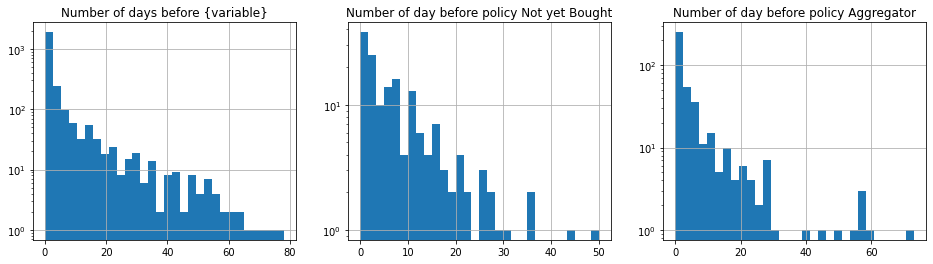

In [161]:
from sklearn import linear_model
import scipy.stats 

# Poisson GLM law to define the time of the process (time from first request to MER or to actual binding)
def LagFirstQuotationRequest(df,variable='is_bound',Stat=True,date="2023-06-23",variable_Output='Unearned_Unbound'):
    '''  df : database containing real cases  (ex : dfStat). These data are censored so we underestimate the actual time of lag. But due to parameter and poisson law, we can estimate it as OK
    ce fichier a FirstQuoteDate	LastQuoteDate qui permettent de voir le temps entre la premiere cotation
    variable = variable to estimate (is_bound, is_MER...)

    '''

    df2=df.copy()
    dfStat = df2[['prospect_id','vh_notyet_bought','is_from_aggregator','is_anonymous','is_not_anonymous',variable,'submission_created_at']].groupby(by = ['prospect_id'],as_index=False).agg(vh_notyet_bought=('vh_notyet_bought', max), 
                                                                                                                                                                is_from_aggregator=('is_from_aggregator', 'max'), 
                                                                                                                                                                is_anonymous=('is_anonymous', 'max'),
                                                                                                                                                                is_not_anonymous=('is_not_anonymous', 'max'),
                                                                                                                                                                variable_to_select=(variable, 'max'),
                                                                                                                                                                SubmissionNbr=('is_bound', 'count'),
                                                                                                                                                                FirstQuoteDate=('submission_created_at',min),
                                                                                                                                                                LastQuoteDate =('submission_created_at',max), 
                                                                                                                                                                   )
    # selection of policies that will transform to binding / MER... (according to the variable selected)
    dfStat = dfStat[(dfStat['variable_to_select'])]

    # initialisation Linear Regression Poisson
    clf = linear_model.PoissonRegressor()

    # nber of days between first and last quotations
    dfStat['day'] =   ((pd.to_datetime(dfStat['LastQuoteDate']) - pd.to_datetime(dfStat['FirstQuoteDate'])) / np.timedelta64(1, 'D')).apply(np.floor)

    # learning phase on policies bound or MER
    X = dfStat[['vh_notyet_bought','is_anonymous'	,]]
    y = dfStat['day']    # number of Day from the first Quote Request to the binding / MER


    
    # Graphical view
    if Stat:
        fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(16, 4))
        ax0.set_title("Number of days before {variable}")
        _ = dfStat["day"].hist(bins=30, log=True, ax=ax0)
        ax1.set_title("Number of day before policy Not yet Bought")
        _ = dfStat["day"][(dfStat['vh_notyet_bought'])].hist(bins=30, log=True, ax=ax1)
        ax2.set_title("Number of day before policy Aggregator")
        _ = dfStat["day"][(dfStat['is_anonymous'])].hist(bins=30, log=True, ax=ax2)
    
    # Statistic of the Poisson Regression
    if Stat:
        print('Poisson Regression')
        display(clf.fit(X,y ))
        print('Poisson Score'+str(clf.score(X, y)))
        print('coefficients')
        display(clf.coef_)

    # application of results to the base
    
    df2['day']= ((date - pd.to_datetime(df2['submission_created_at'])) / np.timedelta64(1, 'D')).apply(np.floor)
 
 
    df2['ExpectedDay']= clf.predict(df2[['vh_notyet_bought',		'is_anonymous']])

    df2[variable_Output] = 1-scipy.stats.poisson.cdf(df2['day'], df2['ExpectedDay'], loc=0)  
    df2[variable_Output] = df2[variable_Output].mask((df2[variable]),0)
    #display(df2) 
    print("Nbr of equivalent policy with still full transformation expected (to be suppressed of denominator ratio) : "+str(df2[variable_Output].sum()))

    return df2


dfFormatLL3= LagFirstQuotationRequest(df = dfFormatLL2,date=dateJour,variable='is_bound',variable_Output='Unearned_is_bound')

In [162]:
def AnalysisbyAxis(df,axis,title = 'essai'):
    ''' 
    ['NbreQuote', 'PP_Ornikar', 'Top5_Wakam', 'ecart_euros_Bench1', 'prix_Ornikar_TTC_ya'] a rajouter si on travaille avec la base BaseQuotationavecFuret
    '''
    dfStat = pd.DataFrame(df.groupby(by=axis,dropna=False,as_index=False).agg(
                                                            # NbreQuoteOrnikar=pd.NamedAgg(column="prix_Ornikar_TTC_ya", aggfunc=np.count_nonzero),
                                                            # prix_Ornikar_TTC_ya=pd.NamedAgg(column="prix_Ornikar_TTC_ya", aggfunc="mean"),
                                                            SubmittedQuotationsNonDedouble =  pd.NamedAgg(column="wakam_called", aggfunc="count"),       #Wakam a été appelé
                                                            SubmittedQuotations =  pd.NamedAgg(column="wakam_called_dedouble", aggfunc="sum"),       #Wakam a été appelé
                                                            ViewedQuotations =  pd.NamedAgg(column="tariff_viewed_dedouble", aggfunc="sum"),       #Wakam a répondu positvement  
                                                            UWPolicies =  pd.NamedAgg(column="tariff_accepted", aggfunc="sum"),       #polices
                                                            Unearned_is_bound =  pd.NamedAgg(column="Unearned_is_bound", aggfunc="sum"),       #cotation récente et on mesure ici l'équivalent des cotations non dédoublées qui ne sont pas "acquises" pour le nombre de polices finales
 
                                                            ))
    

    Total = pd.DataFrame(dfStat.sum()).T
    Total[axis]='Total'
    dfStat = pd.DataFrame(pd.concat([dfStat,Total], axis=0).pivot(columns = axis).sum()).T
 
    #dfStat = dfStat.reset_index(drop=True)
    dfStat['Title'] = title.replace('_', ' ')
 
    
    return dfStat


#BaseQuotationbyAxis= AnalysisbyAxis(df=dfFormatLL3,axis='Date')
#BaseQuotationavecFuretbyAxis= AnalysisbyAxis(df=BaseQuotationavecFuret,axis='WeekAkur8',Variabletoanalyse=['md_crm_coefficient'])
#BaseQuotationbyAxis

                                         

In [167]:
def LoopOverVariable(df,axis,title = 'essai'):
    # list of variables to analyse
    VariableProcess = ['vh_notyet_bought','is_dpt_13','is_dpt_93','is_dpt_Monaco']
    VariableStandard = ['is_STANDARD','is_from_aggregator','is_histo_assurance_sup_9mois','Standard - poor CRM']
    VariableInterrupted = ['is_SANS_ANTECEDENT','is_date_derniere_ass_inf_strict_7','is_date_derniere_ass_inf_30',
                        #'is_date_derniere_ass_sup_30',
                        'is_histo_assurance_0_35mois','is_histo_assurance_inf_9mois']

    VariableAge = ['is_JEUNE','is_vehicle_ratio_2125_8.5','Young Driver with EduScore (Good)','Young Driver with EduScore (bad)','Young Driver with No EduScore','Young Driver - 18-21 year',
                #'is_vehicle_ratio_2530_7.5',
                #'is_vehicle_ratio_2530_7'
                ]
    VariableRAG =['is_RAG_ALCOOL','is_RAG_MALUS','is_RAG_NPP','is_RAG','is_sup_2_claims']

 
 
  
    # sum of all variables
    CategoryVariableAnalysis = [VariableProcess,VariableStandard,VariableInterrupted,VariableAge,VariableRAG]
    print(CategoryVariableAnalysis)


    dfStat= AnalysisbyAxis(df=df,axis='Date',title = 'Total')
    for index, typevariable in enumerate(CategoryVariableAnalysis):
        print(typevariable)
        dfFormatLL3 = df[df[typevariable].any(axis='columns')]
        dfStat= pd.concat([dfStat,AnalysisbyAxis(df=dfFormatLL3,axis='Date',title = str(index)+'. At least one below conditions')],axis=0)
        
        #[(Test)]
        for variable in typevariable:
            dfFormatLL3 = df[df[variable]]
            dfStat= pd.concat([dfStat,AnalysisbyAxis(df=dfFormatLL3,axis='Date',title = str(index)+'. '+variable)],axis=0)

        dfFormatLL3 = df[~df[typevariable].any(axis='columns')]
        dfStat= pd.concat([dfStat,AnalysisbyAxis(df=dfFormatLL3,axis='Date',title = str(index)+'. None above condition respected')],axis=0)
    #display(dfStat)
    dfStat = dfStat[[('Title',    ''),
                ('SubmittedQuotationsNonDedouble',    '1. D day'),
                ('SubmittedQuotationsNonDedouble',   '2. W Week'),
                ('SubmittedQuotationsNonDedouble', '3. > 1 week'),
                ('SubmittedQuotationsNonDedouble',       'Total'),
                (           'SubmittedQuotations',    '1. D day'),
                (           'SubmittedQuotations',   '2. W Week'),
                (           'SubmittedQuotations', '3. > 1 week'),
                (           'SubmittedQuotations',       'Total'),
                (              'ViewedQuotations',    '1. D day'),
                (              'ViewedQuotations',   '2. W Week'),
                (              'ViewedQuotations', '3. > 1 week'),
                (              'ViewedQuotations',       'Total'),
                (                    'UWPolicies',    '1. D day'),
                (                    'UWPolicies',   '2. W Week'),
                (                    'UWPolicies', '3. > 1 week'),
                (                    'UWPolicies',       'Total'),
                (             'Unearned_is_bound',    '1. D day'),
                (             'Unearned_is_bound',   '2. W Week'),
                (             'Unearned_is_bound', '3. > 1 week'),
                (             'Unearned_is_bound',       'Total')]]
    
    styler = dfStat.style
    (styler.format(subset="SubmittedQuotationsNonDedouble", precision=0,thousands=',',na_rep='')
        .format(subset="Unearned_is_bound", precision=0,thousands=',',na_rep='')
        .format(subset="SubmittedQuotations", precision=0,thousands=',',na_rep='')
        .format(subset="ViewedQuotations", precision=0,thousands=',',na_rep='')
        .format(subset="UWPolicies", precision=0,thousands=',',na_rep='')
        .format_index(escape="latex", axis=1)
        .format_index(escape="latex", axis=0)
        .hide(level=0, axis=0))  
    return styler

dfStatTotal = LoopOverVariable(df=dfFormatLL3,axis='Date', )
display(dfStatTotal)
dfStatAggregator = LoopOverVariable(df=dfFormatLL3[(dfFormatLL3['is_from_aggregator'])],axis='Date',)
display(dfStatAggregator)


[['vh_notyet_bought', 'is_dpt_13', 'is_dpt_93', 'is_dpt_Monaco'], ['is_STANDARD', 'is_from_aggregator', 'is_histo_assurance_sup_9mois', 'Standard - poor CRM'], ['is_SANS_ANTECEDENT', 'is_date_derniere_ass_inf_strict_7', 'is_date_derniere_ass_inf_30', 'is_histo_assurance_0_35mois', 'is_histo_assurance_inf_9mois'], ['is_JEUNE', 'is_vehicle_ratio_2125_8.5', 'Young Driver with EduScore (Good)', 'Young Driver with EduScore (bad)', 'Young Driver with No EduScore', 'Young Driver - 18-21 year'], ['is_RAG_ALCOOL', 'is_RAG_MALUS', 'is_RAG_NPP', 'is_RAG', 'is_sup_2_claims']]
['vh_notyet_bought', 'is_dpt_13', 'is_dpt_93', 'is_dpt_Monaco']
['is_STANDARD', 'is_from_aggregator', 'is_histo_assurance_sup_9mois', 'Standard - poor CRM']
['is_SANS_ANTECEDENT', 'is_date_derniere_ass_inf_strict_7', 'is_date_derniere_ass_inf_30', 'is_histo_assurance_0_35mois', 'is_histo_assurance_inf_9mois']
['is_JEUNE', 'is_vehicle_ratio_2125_8.5', 'Young Driver with EduScore (Good)', 'Young Driver with EduScore (bad)', 'Yo

[['vh_notyet_bought', 'is_dpt_13', 'is_dpt_93', 'is_dpt_Monaco'], ['is_STANDARD', 'is_from_aggregator', 'is_histo_assurance_sup_9mois', 'Standard - poor CRM'], ['is_SANS_ANTECEDENT', 'is_date_derniere_ass_inf_strict_7', 'is_date_derniere_ass_inf_30', 'is_histo_assurance_0_35mois', 'is_histo_assurance_inf_9mois'], ['is_JEUNE', 'is_vehicle_ratio_2125_8.5', 'Young Driver with EduScore (Good)', 'Young Driver with EduScore (bad)', 'Young Driver with No EduScore', 'Young Driver - 18-21 year'], ['is_RAG_ALCOOL', 'is_RAG_MALUS', 'is_RAG_NPP', 'is_RAG', 'is_sup_2_claims']]
['vh_notyet_bought', 'is_dpt_13', 'is_dpt_93', 'is_dpt_Monaco']
['is_STANDARD', 'is_from_aggregator', 'is_histo_assurance_sup_9mois', 'Standard - poor CRM']
['is_SANS_ANTECEDENT', 'is_date_derniere_ass_inf_strict_7', 'is_date_derniere_ass_inf_30', 'is_histo_assurance_0_35mois', 'is_histo_assurance_inf_9mois']
['is_JEUNE', 'is_vehicle_ratio_2125_8.5', 'Young Driver with EduScore (Good)', 'Young Driver with EduScore (bad)', 'Yo

In [ ]:
# conversion rate
#BaseQuotationbyAxis["Conversion Rate",'1. D day'] = BaseQuotationbyAxis["UWPolicies",'1. D day'] 
#BaseQuotationbyAxis

### Export to Latex & Excel

In [ ]:
#https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.to_latex.html
with open(f'{LATEX_DIRECTORY}/output.tex', "w") as f:
  print(dfStatTotal.to_latex(
    caption="From total Policy Number to Underwriting",
    environment ='table*',
    clines="skip-last;data",
    convert_css=True,
    position_float="centering",
    multicol_align="c",
    siunitx = True,
    hrules=True,
)  , file=f)


In [ ]:
with pd.ExcelWriter(f'{BASE_PATH_RES}/output.xlsx') as writer:
    dfStatTotal.to_excel(writer, na_rep = '',     sheet_name="Underwriting",)
    dfStatAggregator.to_excel(writer, na_rep = '', sheet_name="Aggregator",)

In [ ]:
# Automatic call of Latex to output pdf computing
# https://tex.stackexchange.com/questions/524098/calling-pdflatex-from-a-python-script
import os  
LATEX_DIRECTORY_RES ='C:/Users/guill/GitHub/2023 Ornikar Pricing/pricing-insurance/Latex/'
#LATEX_DIRECTORY_RES = 'C:\Users\guill\GitHub\2023 Ornikar Pricing\pricing-insurance\Latex'
#LATEX_MAIN_DIRECTORY ='C:\Users\guill\GitHub\2023 Ornikar Pricing\pricing-insurance\Latex\OrnikarInsuranceAutomaticResults'
os.chdir(r"C:\Users\guill\GitHub\2023 Ornikar Pricing\pricing-insurance\Latex\OrnikarInsuranceAutomaticResults")
os.system(r"pdflatex main.tex -synctex=1 -interaction=batchmode -no-shell-escape")
# -synctex=1 -interaction=batchmode -output-directory=C:\Users\guill\GitHub\2023 Ornikar Pricing\pricing-insurance\Latex\"
#os.system(f'pdflatex {LATEX_MAIN_DIRECTORY}/main.tex {LATEX_DIRECTORY}')
 

0

In [ ]:
print(f'pdflatex {LATEX_DIRECTORY} ')


pdflatex C:/Users/guill/GitHub/2023 Ornikar Pricing/pricing-insurance/Latex/OrnikarInsuranceAutomaticResults/Dashboard_Latex/ 
